# Boston Marathon 2015-2017 - Exploratory Data Analysis (EDA)

### Importing modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import os
import glob
%matplotlib inline

sns.set_theme()

### Loading data 

Let's load data on finishers from the Boston Marathon for the years of 2015, 2016 and 2017. Dataset can be accessed via this link [Boston dataset](https://www.kaggle.com/datasets/rojour/boston-results). For our analysis, let's focus on key features such as age, gender, country, and race times at various marks throughout the event.

In [2]:
df = pd.concat(map(pd.read_csv, glob.glob('dataset/*.csv')))

df = df[['Age','M/F','Country','5K','10K','15K','20K','25K','30K','35K','40K','Half','Official Time']]

### Basic stats and exploration

In [3]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79638 entries, 0 to 26409
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            79638 non-null  int64 
 1   M/F            79638 non-null  object
 2   Country        79638 non-null  object
 3   5K             79638 non-null  object
 4   10K            79638 non-null  object
 5   15K            79638 non-null  object
 6   20K            79638 non-null  object
 7   25K            79638 non-null  object
 8   30K            79638 non-null  object
 9   35K            79638 non-null  object
 10  40K            79638 non-null  object
 11  Half           79638 non-null  object
 12  Official Time  79638 non-null  object
dtypes: int64(1), object(12)
memory usage: 8.5+ MB


All columns, with the exception of 'Age,' are of the object data type, and there are no null values present in the dataset. I intend to categorize 'Age' into age groups and convert time-related columns into seconds at a later stage.

In [4]:
# Check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {:.2f}%'.format(col,pct_missing))

Age - 0.00%
M/F - 0.00%
Country - 0.00%
5K - 0.00%
10K - 0.00%
15K - 0.00%
20K - 0.00%
25K - 0.00%
30K - 0.00%
35K - 0.00%
40K - 0.00%
Half - 0.00%
Official Time - 0.00%


It appears that there are no missing data.

In [5]:
# Number of unique values per column
df.nunique()

Age                 67
M/F                  2
Country            105
5K                1493
10K               2798
15K               4145
20K               5530
25K               6962
30K               8423
35K               9880
40K              11232
Half              5796
Official Time    11711
dtype: int64

There is a fascinating diversity in the ages and countries represented, which is not surprising given that this marathon is the most popular in the world. It's also intriguing to observe that as the distance increases, runners tend to spread out, resulting in a greater variety of unique time splits over the course of the race.

In [6]:
# Print unique values per column
for col in df:
    print(col)
    print(df[col].unique())
    print('\n')

Age
[25 30 29 28 32 39 27 33 31 42 26 40 46 23 35 24 43 34 37 19 22 41 36 47
 45 48 21 38 20 51 44 50 49 52 56 53 54 55 57 18 59 58 61 66 60 62 68 63
 69 64 65 67 71 72 76 75 74 70 77 78 73 82 80 81 79 83 84]


M/F
['M' 'F']


Country
['ETH' 'KEN' 'USA' 'UKR' 'RSA' 'ITA' 'RUS' 'JPN' 'CAN' 'BEL' 'NZL' 'BLR'
 'AUS' 'GBR' 'CRO' 'ECU' 'GER' 'ESP' 'SWE' 'BRA' 'HKG' 'MEX' 'DEN' 'MAS'
 'IRL' 'ISL' 'CHI' 'GUA' 'FIN' 'SVK' 'COL' 'SUI' 'CHN' 'AUT' 'NED' 'FRA'
 'CRC' 'CYP' 'POL' 'NOR' 'KOR' 'POR' 'TPE' 'PER' 'SIN' 'PAN' 'VEN' 'LUX'
 'CZE' 'VIE' 'MAR' 'BER' 'ROU' 'IND' 'LIE' 'ARG' 'ESA' 'DOM' 'ISR' 'GRE'
 'SLO' 'LTU' 'URU' 'CAY' 'EST' 'JAM' 'UAE' 'VGB' 'TUR' 'LAT' 'AND' 'OMA'
 'BAH' 'TRI' 'INA' 'AHO' 'PHI' 'UGA' 'QAT' 'ZIM' 'TWN' 'HON' 'FLK' 'HUN'
 'JOR' 'ALB' 'SRB' 'PAK' 'BRN' 'BDI' 'EGY' 'THA' 'MLT' 'KSA' 'SMR' 'BUL'
 'ALG' 'NCA' 'BAR' 'GRN' 'PAR' 'TCA' 'KUW' 'MGL' 'NGR']


5K
['0:14:43' '0:14:44' '0:14:45' ... '0:53:11' '0:40:34' '0:39:36']


10K
['0:29:43' '0:29:44' '0:29:45' ... '1:43:36' '1:

In [7]:
# check basic stats for numerical columns 
df.describe()

,Age
count,79638.000000
mean,42.415166
std,11.355453
min,18.000000
25%,34.000000
50%,42.000000
75%,50.000000
max,84.000000


In [8]:
# check basic stats for categorical columns 
df.describe(include=['object','category'])

,M/F,Country,5K,10K,15K,20K,25K,30K,35K,40K,Half,Official Time
count,79638,79638,79638,79638,79638,79638,79638,79638,79638,79638,79638,79638
unique,2,105,1493,2798,4145,5530,6962,8423,9880,11232,5796,11711
top,M,USA,-,-,1:13:50,-,-,-,-,-,-,3:28:30
freq,43482,64474,229,114,79,85,81,88,86,76,62,31


It is noteworthy that a small percentage of runners have a value of '-'. This will be addressed in the next section through feature engineering.

### Feature engineering

1) Grouping ages into official age categories.

In [9]:
df['Age'] = pd.cut(df['Age'], bins = [0,34,39,44,49,54,59,64,69,74,79,100], labels=['18-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80+'])
print(df['Age'].unique())

['18-34', '35-39', '40-44', '45-49', '50-54', ..., '60-64', '65-69', '70-74', '75-79', '80+']
Length: 11
Categories (11, object): ['18-34' < '35-39' < '40-44' < '45-49' ... '65-69' < '70-74' < '75-79' < '80+']


2) Convert string times 'hh:mm:ss' to seconds

In [10]:
def convert_to_seconds(x):
    try:
        h,m,s = x.split(':')
        return int(datetime.timedelta(hours=int(h),minutes=int(m),seconds=int(s)).total_seconds())
    except:
        pass
    
df[['5K_s','10K_s','15K_s','20K_s','25K_s','30K_s','35K_s','40K_s','Half_s','Official_time_s']] = df[['5K','10K','15K','20K','25K','30K','35K','40K','Half','Official Time']].applymap(convert_to_seconds)

3) Determine the average speed within each segment (in km/h) for intervals ranging from 0-5 km, 5-10 km, 10-15 km, and so on up to 35-40 km.

In [11]:
columns = ['5K_s','10K_s','15K_s','20K_s','25K_s','30K_s','35K_s','40K_s']

for i in range(1, len(columns)):
    new_column_name = f'{columns[i-1]}-{columns[i]}_speed'
    df[new_column_name] = 5/(df[columns[i]] - df[columns[i-1]])*3600

Check for missing values after transformations

In [12]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {:.4f}%'.format(col,pct_missing))

Age - 0.0000%
M/F - 0.0000%
Country - 0.0000%
5K - 0.0000%
10K - 0.0000%
15K - 0.0000%
20K - 0.0000%
25K - 0.0000%
30K - 0.0000%
35K - 0.0000%
40K - 0.0000%
Half - 0.0000%
Official Time - 0.0000%
5K_s - 0.0029%
10K_s - 0.0014%
15K_s - 0.0006%
20K_s - 0.0011%
25K_s - 0.0010%
30K_s - 0.0011%
35K_s - 0.0011%
40K_s - 0.0010%
Half_s - 0.0008%
Official_time_s - 0.0000%
5K_s-10K_s_speed - 0.0040%
10K_s-15K_s_speed - 0.0017%
15K_s-20K_s_speed - 0.0014%
20K_s-25K_s_speed - 0.0017%
25K_s-30K_s_speed - 0.0017%
30K_s-35K_s_speed - 0.0018%
35K_s-40K_s_speed - 0.0018%


Since only a small percentage of rows contain missing values, let's proceed by removing those rows.

In [13]:
df.dropna(inplace = True)
df = df.drop_duplicates()
df.isna().sum()

Age                  0
M/F                  0
Country              0
5K                   0
10K                  0
15K                  0
20K                  0
25K                  0
30K                  0
35K                  0
40K                  0
Half                 0
Official Time        0
5K_s                 0
10K_s                0
15K_s                0
20K_s                0
25K_s                0
30K_s                0
35K_s                0
40K_s                0
Half_s               0
Official_time_s      0
5K_s-10K_s_speed     0
10K_s-15K_s_speed    0
15K_s-20K_s_speed    0
20K_s-25K_s_speed    0
25K_s-30K_s_speed    0
30K_s-35K_s_speed    0
35K_s-40K_s_speed    0
dtype: int64

### Visualizations

Let's visualize and further explore the data

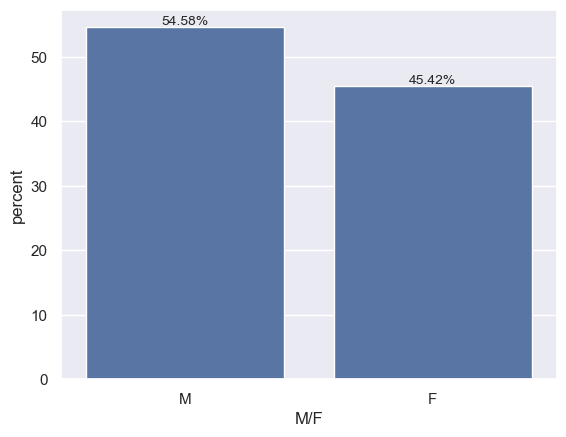

In [14]:
ax = sns.countplot(df, x="M/F", stat="percent");
ax.bar_label(ax.containers[0], fontsize=10, fmt='%.2f%%');

We can observe a higher participation rate among men, but surprisingly, there is also significant female involvement. Typically, full marathons are predominantly male-dominated, but in this case, we see a notable presence of women as well.

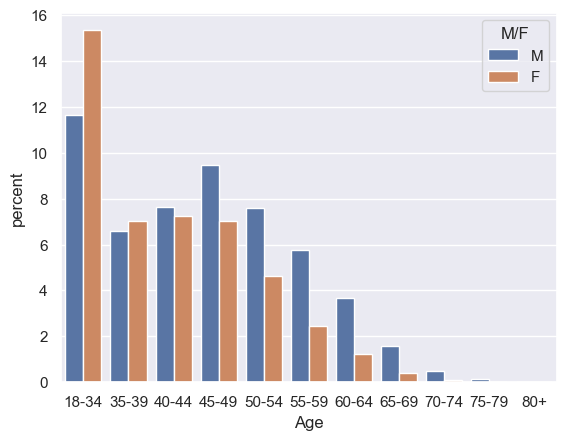

In [15]:
sns.countplot(df, x="Age", hue="M/F", stat="percent");

This figure shows the percentage distribution of participants based on gender and age groups. An intriguing observation is that females dominate in participation up to the age of 40, whereas beyond that point, males constitute a larger proportion. One possible interpretation could be that as individuals age, women may take on more responsibilities related to household tasks, potentially impacting their availability for certain activities. In contrast, men might have relatively more leisure time for extracurricular pursuits as they age.

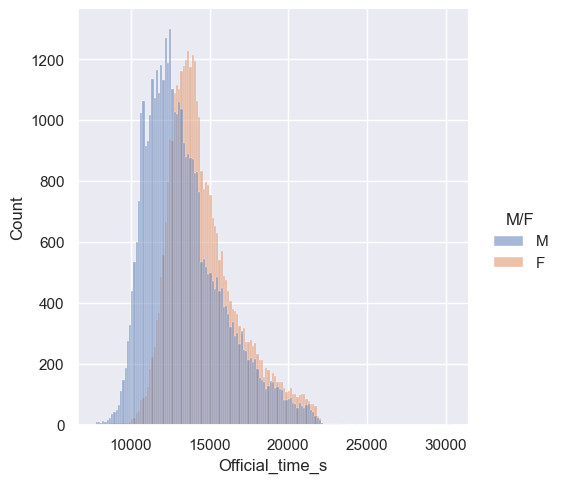

In [16]:
sns.displot(data=df, x="Official_time_s", hue="M/F");

This distribution plot indicates that, on average, males tend to exhibit higher speeds than females. However, it is important to note a substantial overlap in official finish times between the two genders, suggesting that there is a significant region where the performance of male and female participants converges.

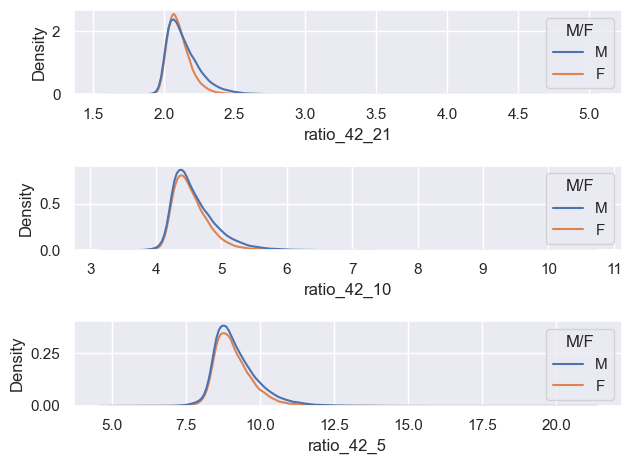

In [17]:
df['ratio_42_21'] = df['Official_time_s']/df['Half_s']
df['ratio_42_10'] = df['Official_time_s']/df['10K_s']
df['ratio_42_5'] = df['Official_time_s']/df['5K_s']

fig, axes = plt.subplots(3, 1)
sns.kdeplot(ax=axes[0], data=df, x="ratio_42_21", hue="M/F" )
sns.kdeplot(ax=axes[1], data=df, x="ratio_42_10", hue="M/F")
sns.kdeplot(ax=axes[2], data=df, x="ratio_42_5", hue="M/F")
plt.tight_layout()

This figure illustrates the ratio of finish time to half marathon, 10km, and 5km times based on gender. The primary objective is to examine the deceleration of runners by gender. Notably, the first subplot highlights that males experience a greater slowdown compared to females. This observation suggests that females exhibit better endurance than males, a trend that aligns with factual information on the subject.

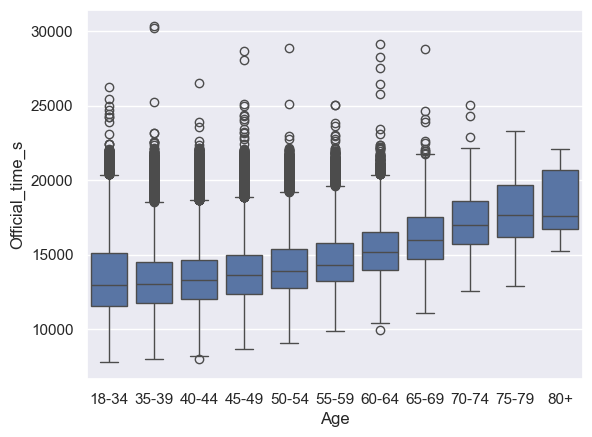

In [18]:
sns.boxplot(data=df, x="Age", y="Official_time_s");

From the boxplots, it's evident that the median finish times increase with the age of runners, aligning with the expected trend. Notably, the peak "maturity" for runners occurs in the 35-39 age group, where typical best times are achieved. However, this pattern holds true predominantly for non-elite runners. In contrast, elite runners attain their peak performance much earlier, typically in the 18-34 age group.

To illustrate, the most recent marathon record was set on October 8, 2023, when Kiptum triumphed in the Chicago Marathon with a world record time of 2:00:35, surpassing Kipchoge's previous record by 34 seconds. This emphasizes that elite runners often achieve remarkable feats at a much younger age compared to their non-elite counterparts.

Regarding the outliers in finishing times, this analysis presents an intriguing perspective. Officially, any results exceeding 6 hours (21,600 seconds) should not be considered as finished times. However, it is noteworthy that, as depicted in the boxplots, some runners are capable of completing the race in times surpassing this limit.

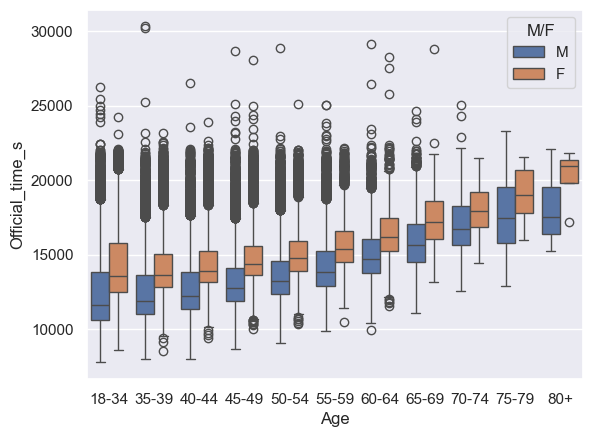

In [19]:
sns.boxplot(data=df, x="Age", y="Official_time_s", hue = "M/F");

Similar conclusions can be inferred from the previous figure. Additionally, there is apparent evidence indicating a significant difference in median finish times based on the gender of the runners.

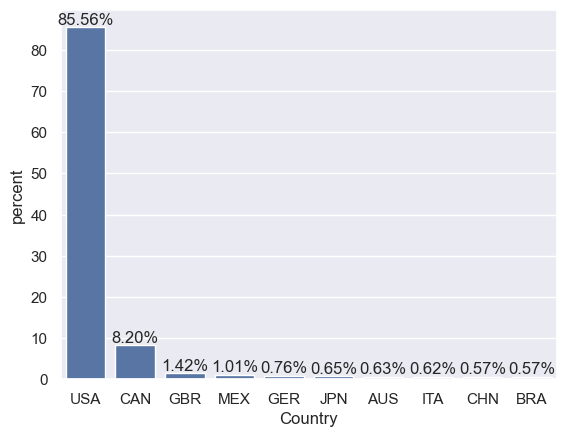

In [20]:
s = df.groupby('Country')['Official_time_s'].count().sort_values(ascending=False).head(10)
ax = sns.countplot(data=df[df['Country'].isin(s.index)], x="Country", order = s.index, stat="percent")
ax.bar_label(ax.containers[0], fmt='%.2f%%');

While the Boston Marathon primarily takes place in the USA, attracting a significant number of American runners, it also draws participants from over 100 countries worldwide.

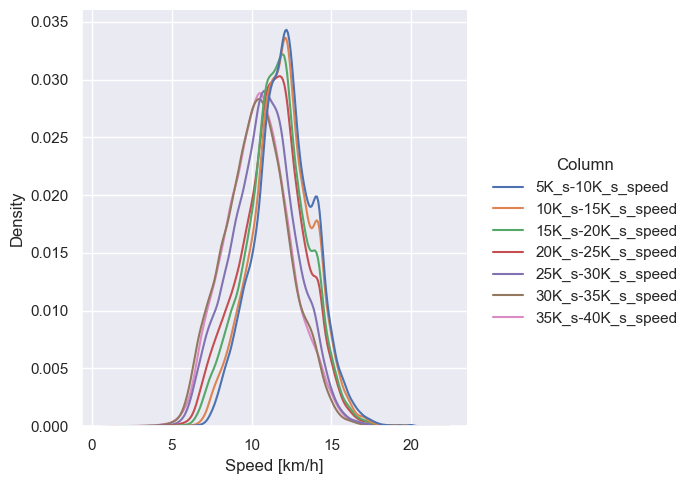

In [21]:
df_melt = df.iloc[:,-10:-3]
df_melted = pd.melt(df_melt, var_name='Column', value_name='Value')

ax = sns.displot(data=df_melted, x="Value", hue="Column", kind="kde")
plt.xlabel('Speed [km/h]');

This graph illustrates intriguing insights into marathon running. The lines in the legend indicate the average speed in 5-kilometer increments, calculated by dividing the distance covered by the time taken. The x-axis represents speed in km/h. Notably, as the race progresses, the distribution shifts leftward, signifying a decrease in speed due to accumulating fatigue.

However, a particularly noteworthy observation is the most significant deceleration occurring in the 25 to 30 km range. This phenomenon aligns with the concept of 'hitting the wall,' which refers to a sudden and pronounced decline in energy and performance. 'Hitting the wall' is attributed to the depletion of muscle glycogen stores, impacting a runner's ability to perform optimally or even complete the race. Typically, runners experience this around the 30-kilometer mark.

## Correlations

Let's proceed with our analysis by conducting a correlation assessment between variables, particularly gender, age group, and race finish time. Despite the visualizations in the previous section indicating correlations among gender, age group and race finish time, performing a formal correlation analysis will provide further insights.

#### Age vs Official times

Let's perform the ANOVA (Analysis Of Variance) test since Age is a categorical variable (nominal) while age is a numerical variable. ANOVA determines if there are significant differences between the means of numeric variables for each categorical value.

Null hypothesis(H0) ANOVA hypothesis test: The variables are not correlated with each other.

In [22]:
from scipy.stats import f_oneway
 
CategoryGroupLists=df.groupby('Age')['Official_time_s'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.0


As the output of the P-value is almost zero, hence, we reject H0. This means the Age and Official times are correlated with each other.

#### Gender vs Official times

Since Gender is dichotomous variable, I will performe Point-Biserial Correlation. A point-biserial correlation is used to measure the strength and direction of the association that exists between one continuous variable and one dichotomous variable. It is a special case of the Pearson’s correlation, which is applied when we have two continuous variables.

In [23]:
from scipy.stats import pointbiserialr

# Convert gender to numeric (0 for Male, 1 for Female)
df['M/F_mapped'] = df['M/F'].map({'M': 0, 'F': 1})

# Calculate point-biserial correlation
correlation, p_value = pointbiserialr(df['M/F_mapped'], df['Official_time_s'])

# Print the correlation coefficient and p-value
print(f'Point-biserial correlation: {correlation}')
print(f'P-value: {p_value}')

Point-biserial correlation: 0.2487114540540859
P-value: 0.0


As the output of the P-value is almost zero, hence, we reject H0. This means the Gender and Official times are correlated with each other.

#### Age and Gender vs Official times

The two-way ANOVA is an extension of the one-way ANOVA that examines the effect of two different categorical independent variables or two independent factors (in this case Age and Gender) on one continuous dependent variable (in this case Official times).

In [24]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

df_anova = df[['Age','M/F','Official_time_s']]
df_anova.columns = ['Age','Gender','Official_time_s']

# Fit the two-way ANOVA model
formula = 'Official_time_s ~ Age + Gender + Age:Gender'
model = ols(formula, df_anova).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                  sum_sq       df            F        PR(>F)
Age         5.065523e+10     10.0   982.558416  0.000000e+00
Gender      4.620447e+10      1.0  8962.270821  0.000000e+00
Age:Gender  4.634998e+08     10.0     8.990495  5.713689e-15
Residual    4.071665e+11  78978.0          NaN           NaN


The p-value obtained from two-way ANOVA analysis for Age, Gender and Official times are statistically significant (p<0.05). We can conclude that Age significantly affects the Official times, Gender significantly affects the Official times, and the interaction of both Age and Gender significantly affects the Official times.

#### Age vs Gender

Let's also check if Age and Gender are independent categorical variables by performing the Chi-Squared test of independence.
Assumption(H0): The two columns are NOT related to each other.

In [27]:
from scipy.stats import chi2_contingency

CrosstabResult=pd.crosstab(index=df['Age'],columns=df['M/F'])
print(CrosstabResult)
 
ChiSqResult = chi2_contingency(CrosstabResult)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

M/F        F     M
Age               
18-34  12115  9200
35-39   5539  5212
40-44   5727  6047
45-49   5551  7479
50-54   3666  5988
55-59   1939  4557
60-64    956  2906
65-69    302  1240
70-74     70   373
75-79     12    96
80+        4    21
The P-Value of the ChiSq Test is: 0.0


In the above test, the p-value came lower than 0.05. Hence H0 will be rejected. This means the variables are correlated with each other. 

### Conclusion


The analysis presented in this notebook has unveiled intriguing insights into the influence of gender and age on runners' performance. Given the dataset spans three years of the Boston Marathon, the conclusions drawn here carry substantial confidence. Notably, these findings align with established scientific knowledge on marathon running. The correlation identified between the analyzed variables and official marathon finish times prompts an exciting next step: the development of a regression model. This model aims to predict marathon finish times using input features such as gender, age, 5k split times, etc. Future plans include refining this regression model and presenting the results through an interactive dashboard. 

Wishing you all safety and regular exercise!